# Loan Eligibility Prediction

## Imports

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [160]:
dataset = pd.read_csv("loan-train.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [161]:
# df.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Handling Missing Values

In [162]:
# finding null values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling missing values for numerical terms using `mean`

In [163]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

### Filling the missing values for categorical terms using `mode`

In [164]:
dataset['Gender'] = dataset["Gender"].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset["Married"].fillna(dataset['Married'].mode()[0])
dataset['Dependents'] = dataset["Dependents"].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed'] = dataset["Self_Employed"].fillna(dataset['Self_Employed'].mode()[0])

In [165]:
# checking if anymore missing values are there or not
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

In [166]:
dataset['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

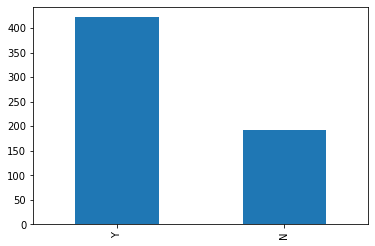

In [167]:
dataset['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 were approved.

### i) Univariate Analysis

### Categorical Variables

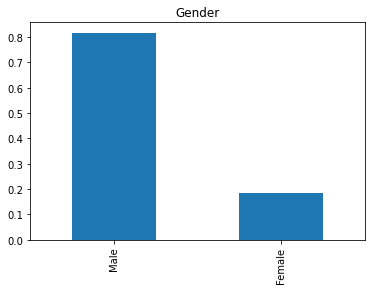

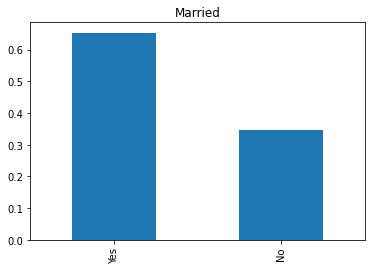

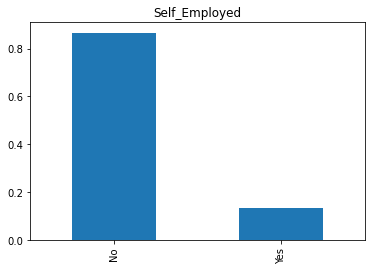

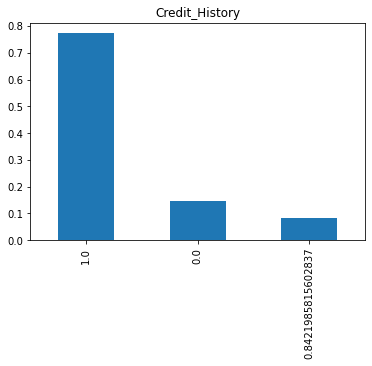

In [168]:
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:

- 80% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of applicants in the dataset are self-employed.
- Around 85% of applicants have repaid their debts.

### Ordinal Variables

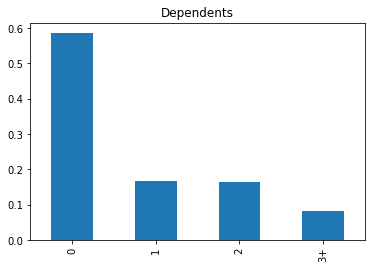

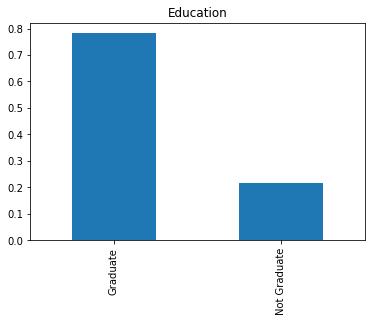

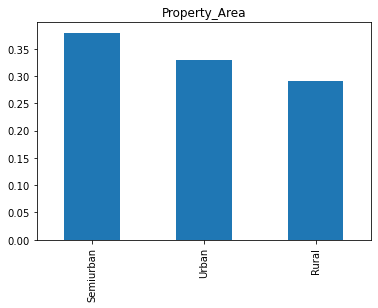

In [169]:
dataset['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:

- Most of the applicants don't have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from the Semiurban area.

### Numerical Variables

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


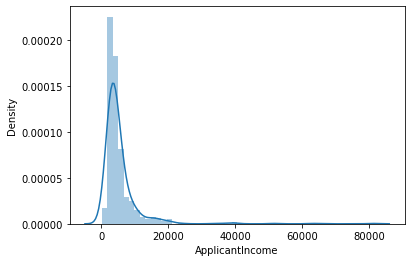

In [170]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

Most of the data in the distribution of applicant income are towards the left (not normally distributed) We should make it normal as algorithms work better if the data is normally distributed.

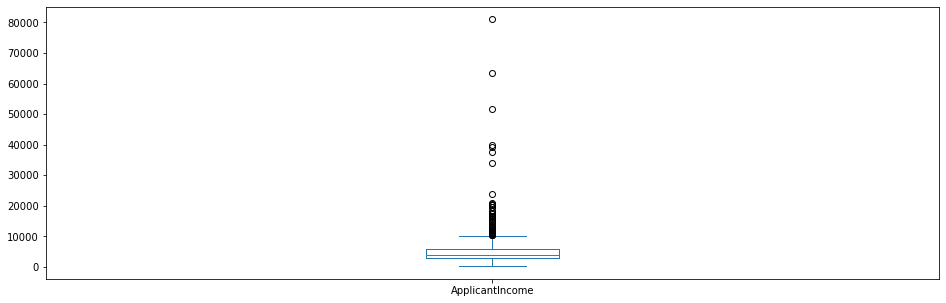

In [171]:
dataset['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The boxplot confirms the presence of a lot of outliers/extreme values. This can be due to the income disparity in the society. It also shows us that we are looking at people with different education levels. Let us segregate them by Education.

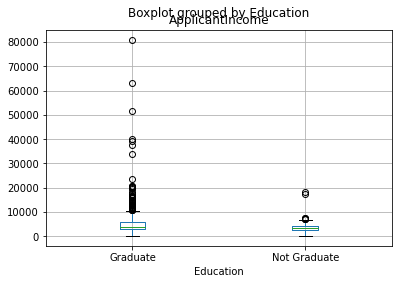

In [172]:
dataset.boxplot(column='ApplicantIncome', by = 'Education') 
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


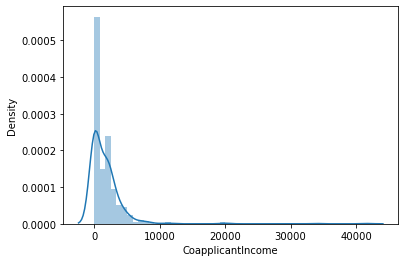

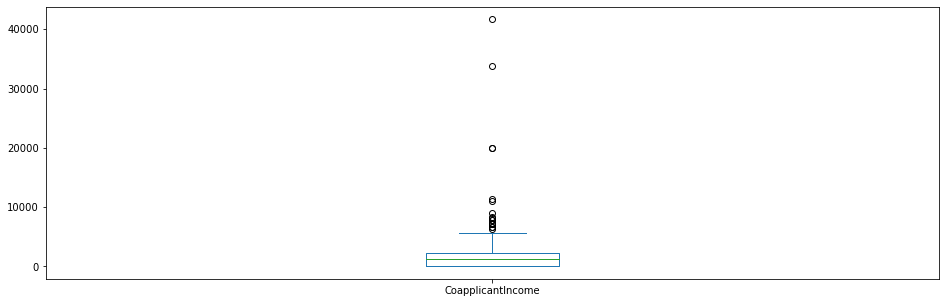

In [173]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()
dataset['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

There is a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


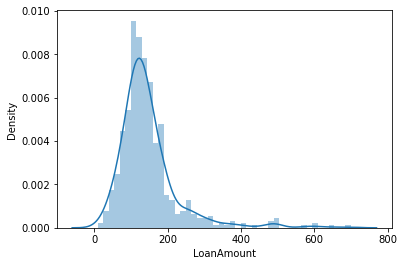

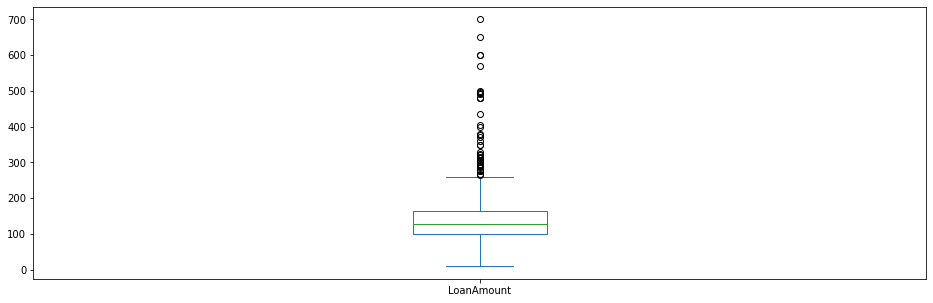

In [174]:
dataset.notna()
sns.distplot(dataset['LoanAmount'])
plt.show()
dataset['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.

### ii) Bivariate Analysis
Independent Variable vs Target Variable

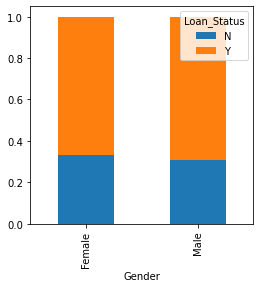

In [175]:
Gender=pd.crosstab(dataset['Gender'],dataset['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The proportion of male and female applicants is more or less the same for both approved and unapproved loans

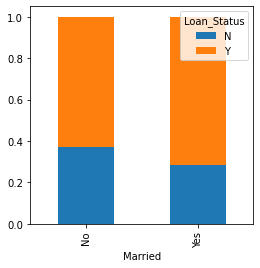

In [176]:
Married=pd.crosstab(dataset['Married'],dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The proportion of married applicants is higher for approved loans.

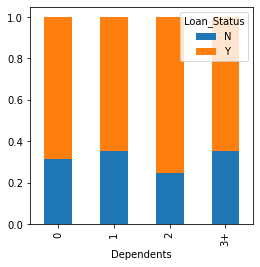

In [177]:
Dependents=pd.crosstab(dataset['Dependents'],dataset['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

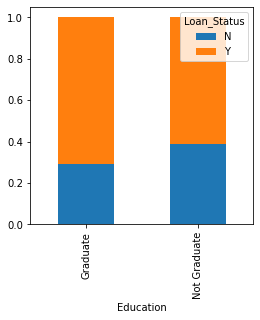

In [178]:
Education=pd.crosstab(dataset["Education"],dataset["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The proportion of graduate applicants is higher for approved loans.

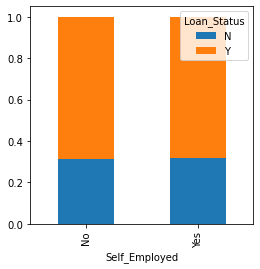

In [179]:
Self_Employed=pd.crosstab(dataset["Self_Employed"],dataset["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

There is nothing significant we can infer from Self_Employed vs Loan_Status plot

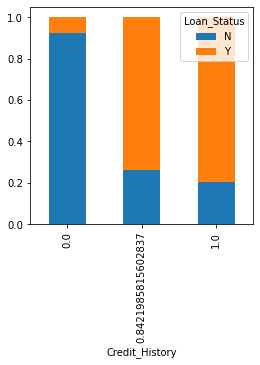

In [180]:
Credit_History=pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

People with a credit history as 1 (cleared their previous debts) are more likely to get their loans approved.



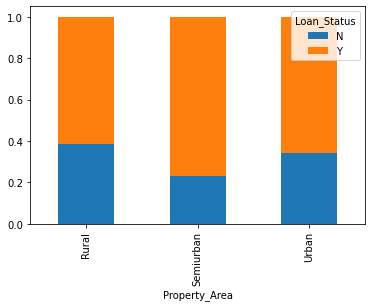

In [181]:
Property_Area=pd.crosstab(dataset['Property_Area'],dataset['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas

<AxesSubplot:xlabel='Loan_Status'>

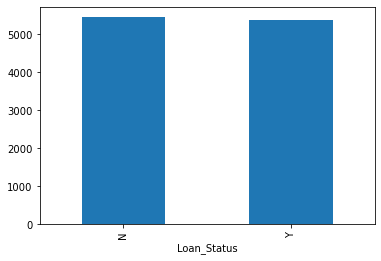

In [182]:
# Mean income of people where loan approved vs loan has not been approved.
dataset.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

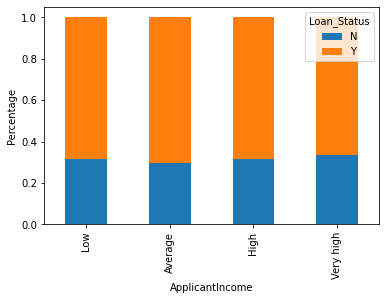

In [183]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
Incomes=pd.cut(dataset['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(Incomes,dataset['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant's income does not affect the chances of loan approval

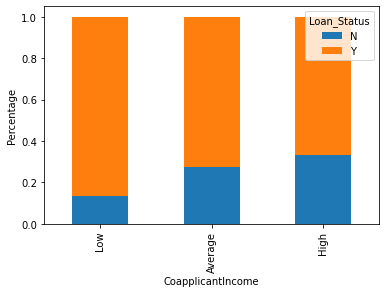

In [184]:
#Similarly analyzing co-applicant income and loan amount
bins=[0,1000,3000,42000]
group=['Low','Average','High']
Coapp_Income_Bin=pd.cut(dataset['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(Coapp_Income_Bin,dataset['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high.
But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it.

Hence we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.
Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

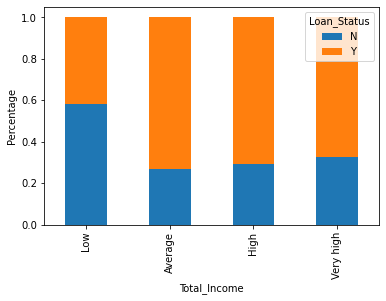

In [185]:
Total_Income=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
Total_Income_bin=pd.cut(Total_Income,bins,labels=group)
Total_Income_bin=pd.crosstab(Total_Income_bin,dataset['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

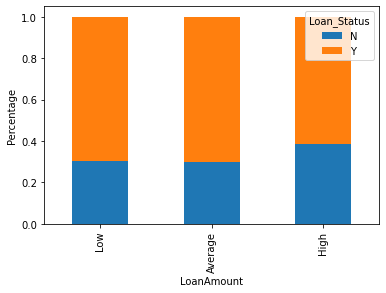

In [186]:
#Visualizing the Loan Amount variable
bins=[0,100,200,700]
group=['Low','Average','High']
Loan_Amount=pd.cut(dataset['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(Loan_Amount,dataset['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount
Thus the chances of loan approval will be high when the loan amount is less.



### Correlation

<AxesSubplot:>

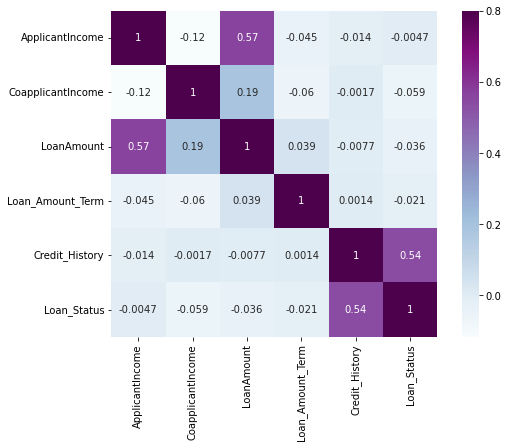

In [187]:
# Heat map to visualize the correlation
# Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

dataset["Loan_Status"].replace('N', 0,inplace=True)
dataset["Loan_Status"].replace('Y', 1,inplace=True)
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

The most correlated variables are

- ApplicantIncome - LoanAmount
- Credit_History - Loan_Status
- LoanAmount - CoapplicantIncome

In [188]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True) 
#To check how credit history and loan status is dependent

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


Hence applicants with credit history are more likely to be approved a loan

### Handling Outliers

<AxesSubplot:>

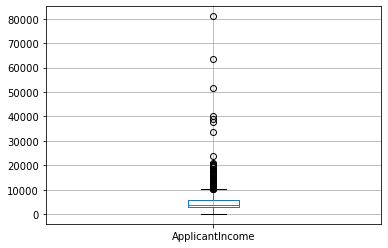

In [189]:
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

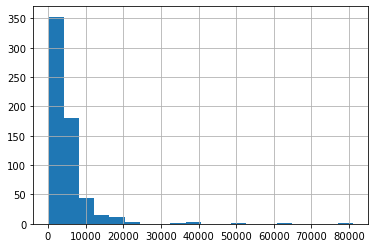

In [190]:
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

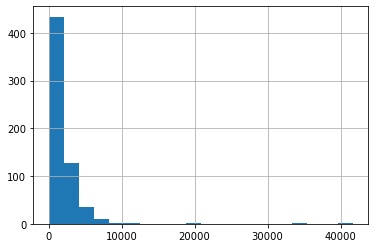

In [191]:
dataset['CoapplicantIncome'].hist(bins=20)

Histogram is right skewed. Must be normalised.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

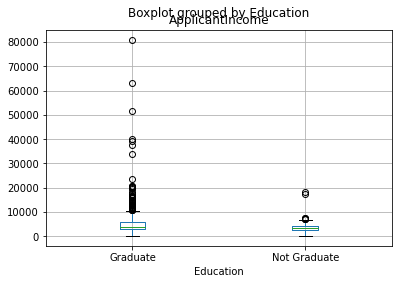

In [192]:
dataset.boxplot(column='ApplicantIncome', by='Education')

Median salaries of both the groups do not vary much. But few graduates have high salaries.

<AxesSubplot:>

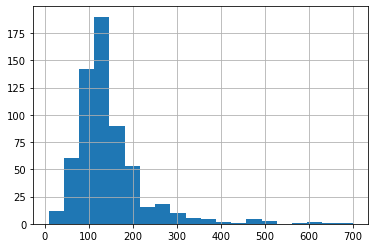

In [193]:
dataset['LoanAmount'].hist(bins=20)

### Normalizing Loan amount

<AxesSubplot:>

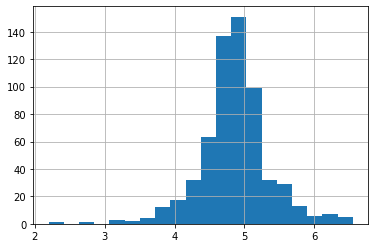

In [194]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

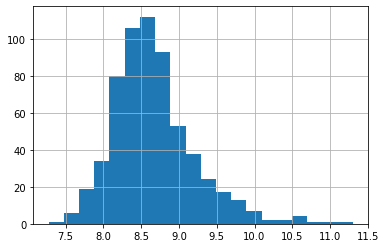

In [195]:
#Finding total income by summing applicant and co-applicant income, Finding log of total income
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

## Data Preprocessing and Train Test Split

### Train test split and label encoding

In [196]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [197]:
#Dividing dataset into independent and dependent(target) variables 
X = dataset.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = dataset.iloc[:, 12].values

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [199]:
from sklearn import preprocessing
labelencoder_X = preprocessing.LabelEncoder() #instance of the label encoder

In [200]:
for i in range(0, 5): #index 0 to 5 - independent variables
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i].astype(str))

X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7].astype(str)) #index 7

# X_train

In [201]:
#For y_train
labelencoder_y = preprocessing.LabelEncoder()
y_train =labelencoder_y.fit_transform(y_train)
# y_train

In [202]:
#for X_test
labelencoder_X = preprocessing.LabelEncoder()
for i in range(0, 5): #index 0 to 5
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i].astype(str))
    
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7].astype(str)) #index 7
# X_test

In [203]:
#for y_test
y_test = labelencoder_y.fit_transform(y_test)
# y_test

### scaling

In [204]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Decesion Tree Classification

In [205]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [206]:
y_pred_dtc = DTclassifier.predict(X_test)
y_pred_dtc

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [207]:
from sklearn import metrics
print("Accuracy score using Decision Tree= ", metrics.accuracy_score(y_pred_dtc, y_test))

Accuracy score using Decision Tree=  0.6991869918699187


## Navie Bayes 

In [208]:
from sklearn.naive_bayes import GaussianNB
NBClassifier =GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [209]:
y_pred_nb = NBClassifier.predict(X_test)
y_pred_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [210]:
print("Accuracy score using Naive Bayes = ", metrics.accuracy_score(y_pred_nb, y_test))

Accuracy score using Naive Bayes =  0.8292682926829268


## Prediction

In [211]:
testdata = pd.read_csv("loan-test.csv")
testdata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [212]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [213]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True) 
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True) 
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True) 
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True) 
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True) 
testdata.LoanAmount = testdata.LoanAmount.fillna(dataset.LoanAmount.mean())

In [214]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [215]:
testdata["LoanAmount_log"] = np.log(testdata["LoanAmount"])
testdata["TotalIncome"] = testdata["ApplicantIncome"] + testdata["CoapplicantIncome"]
testdata["TotalIncome_log"] = np.log(testdata["TotalIncome"])

In [216]:
test = testdata.iloc[:, np.r_[1:5,9:11,13:15]].values

In [217]:
for i in range(0, 5): #index 0 to 5 - independent variables
    test[:,i] = labelencoder_X.fit_transform(test[:,i].astype(str))

In [218]:
test[:,7] = labelencoder_X.fit_transform(test[:,7].astype(str))

In [219]:
test = ss.fit_transform(test)

In [220]:
pred = NBClassifier.predict(test)
# pred

In [221]:
testdata['Predicted_LoanStatus'] = pred

In [222]:
testdata['Eligibility'] = testdata['Predicted_LoanStatus'].map({1: "Eligible",  0:"Not Eligible"})

In [223]:
output = testdata[["Loan_ID", "Predicted_LoanStatus", "Eligibility"]]
output.head(30)

,Loan_ID,Predicted_LoanStatus,Eligibility
0,LP001015,1,Eligible
1,LP001022,1,Eligible
2,LP001031,1,Eligible
3,LP001035,1,Eligible
4,LP001051,1,Eligible
5,LP001054,1,Eligible
6,LP001055,1,Eligible
7,LP001056,0,Not Eligible
8,LP001059,1,Eligible
9,LP001067,1,Eligible
